<a href="https://colab.research.google.com/github/Peckkie/DPDM2021/blob/main/DPDM2021_Midterm_645020061_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
import pandas as pd # ทำงานกับข้อมูลลักษณะ ตาราง

In [274]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


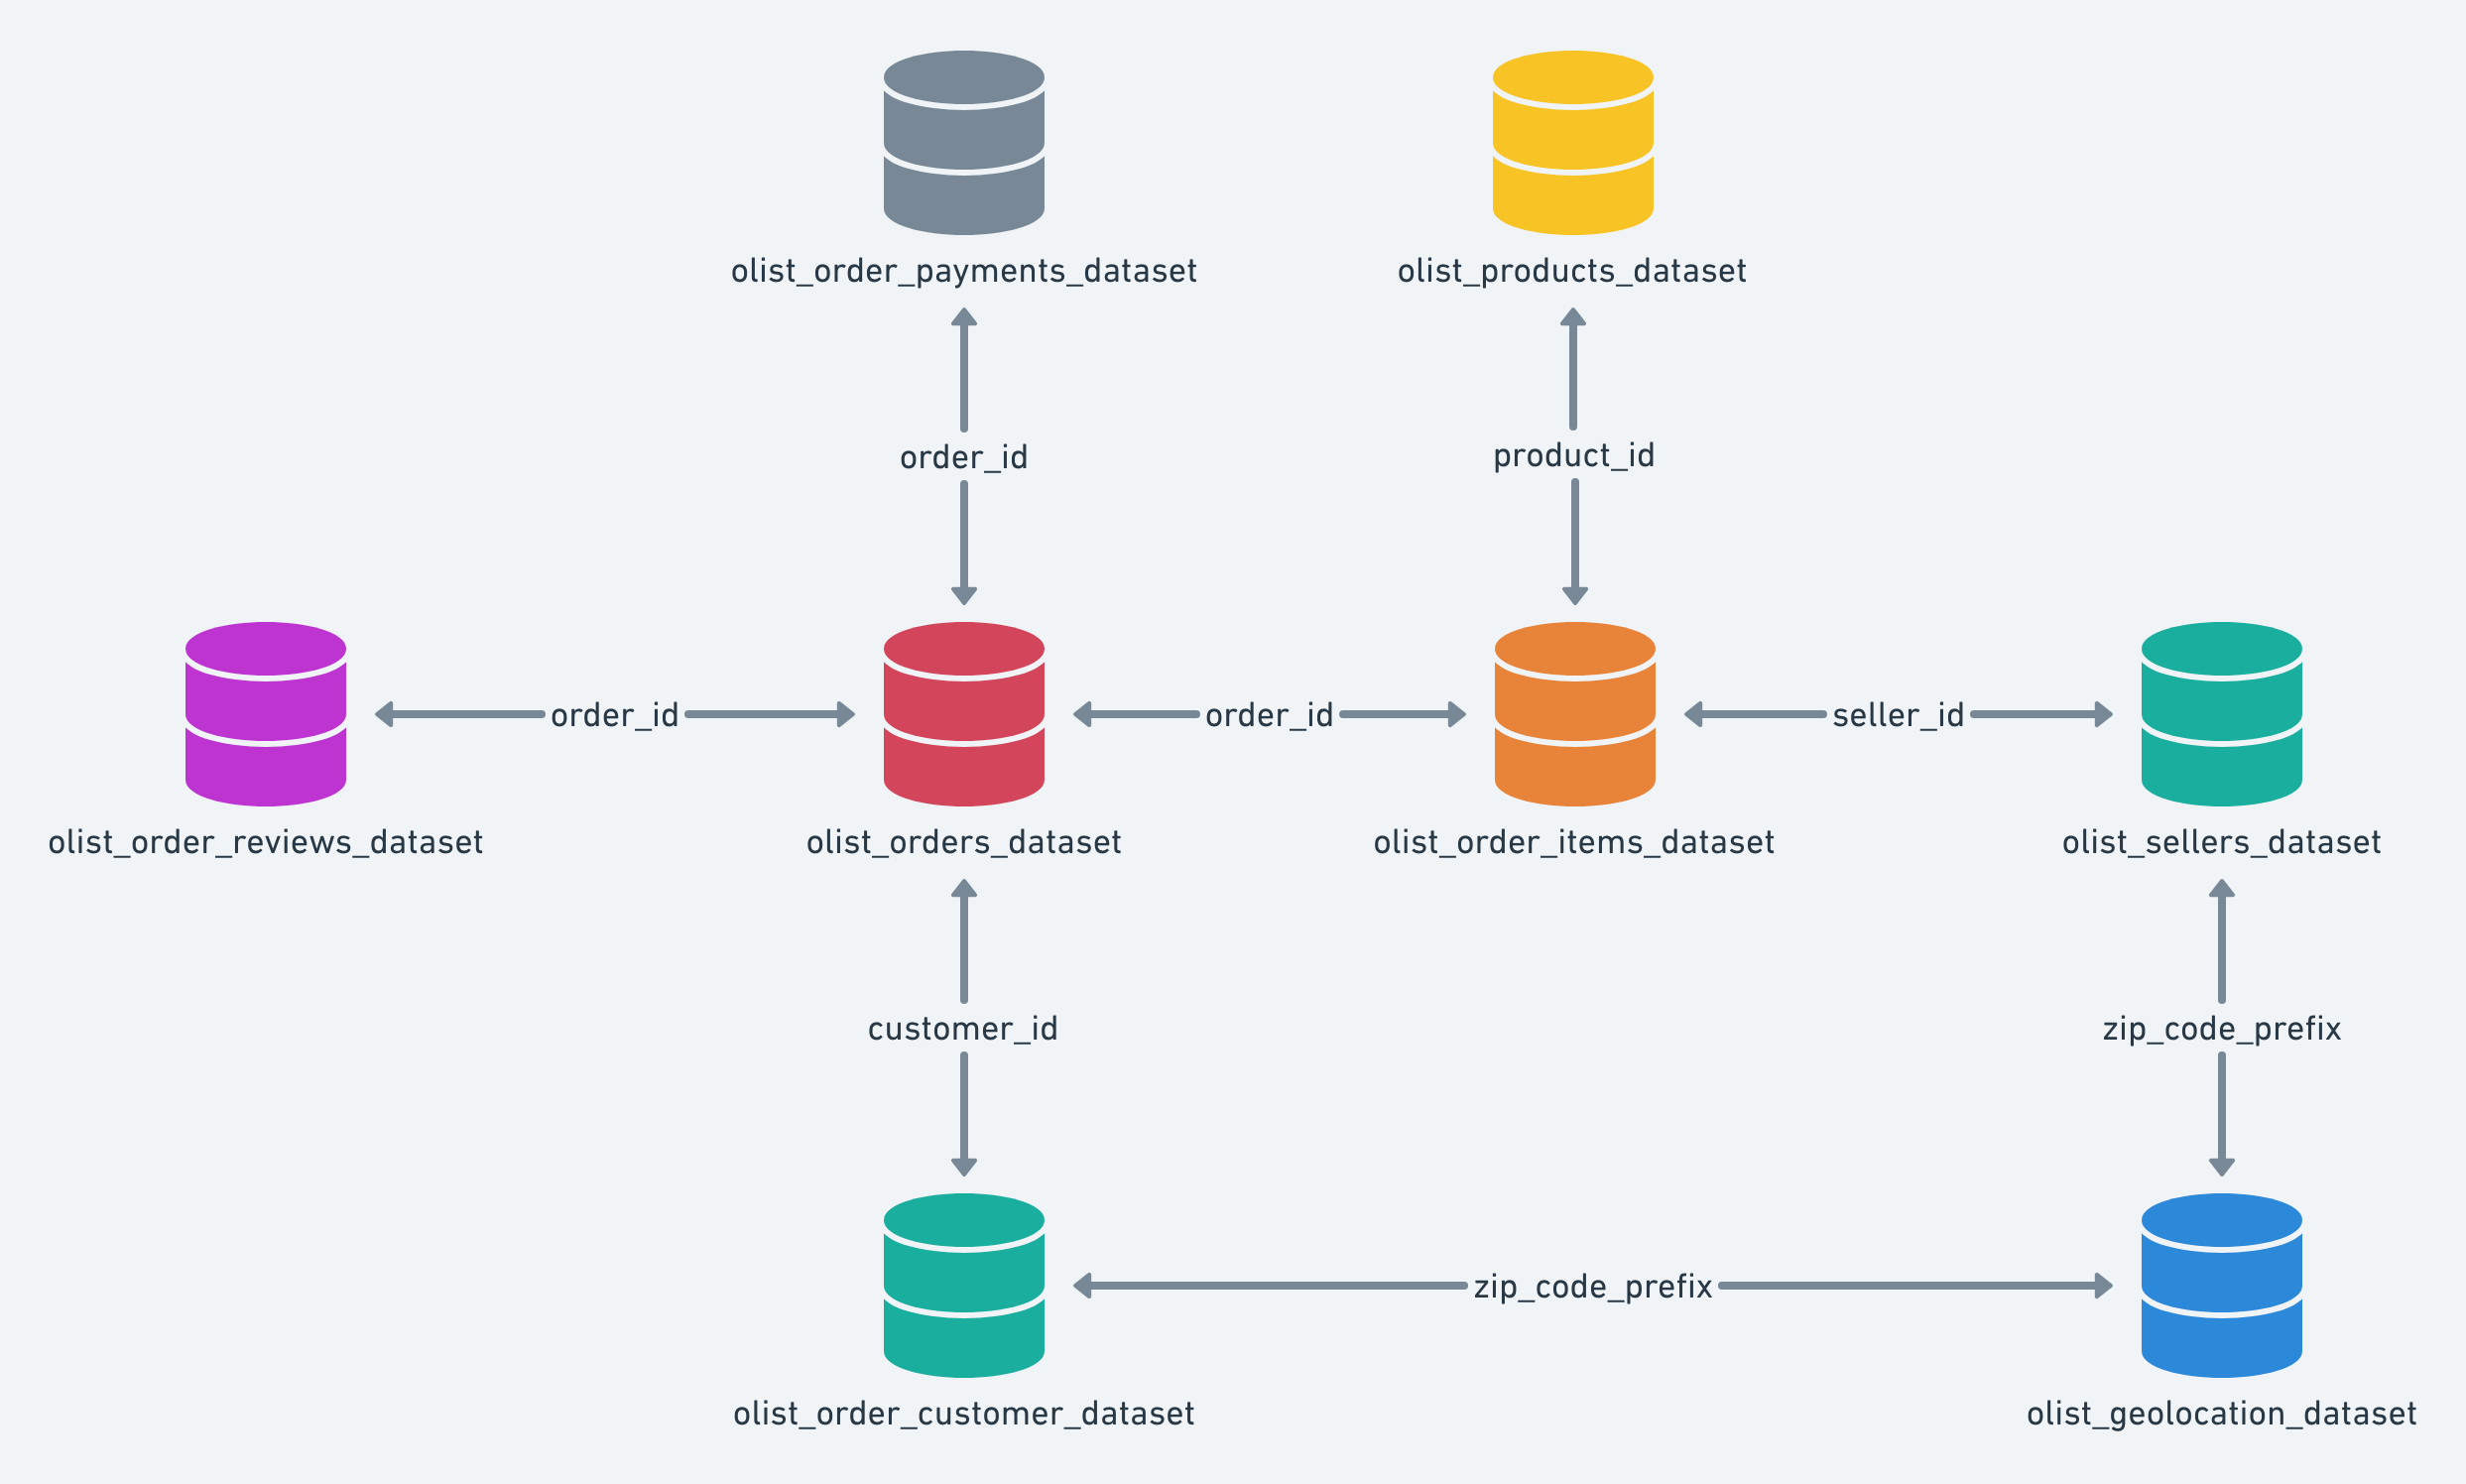


# **นางสาว ยุภาภรณ์ วันนา 645020061-2**

# โจทย์
ข้อมูล จาก website e-commerce ของประเทศบราซิล  

https://drive.google.com/drive/folders/1QkExw0FN5CzLwC8JlHtywmznLevMcZGV?usp=sharing

1. ทำ visualization แสดงชนิดสินค้ายอดนิยม (product category (ภาษาอังกฤษ)) ในช่วงเวลาต่างๆ
2. ทำ visualization แสดงมูลค่าการสั่งซื้อ (ราคารวม) ในตามวันในสัปดาห์ (Day of the week)
3. ทำ visualization แสดงสินค้ายอดนิยมในแต่ละรัฐ (state)
4. เดือนไหน ที่มีคนซื้อสินค้ามากที่สุด (จำนวนคำสั่งซื้อ) ชนิดสินค้า(product category ภาษาอังกฤษ) อะไร (จำนวน item)

* การแบ่งช่วงเวลาให้นักศึกษาแบ่งและอธิบายเหตุผลการแบ่งด้วยตัวเอง

> แบ่ง 24 ชั่วโมงเป็น 2 ส่วน 
>*   ช่วงกลางวัน “06.00 น. - 18.00 น.”
>*   ช่วงกลางคืน“18.01 น. - 05.59 น.”

* คิดโจทย์ที่คิดว่าน่าสนใจ 2 ข้อและแสดงวิธีทำ
5. ทำ visualization แสดงมูลค่าการสั่งซื้อ (ราคารวม) ของแต่ละวันในในสัปดาห์ (Day of the week) ตามช่วงเวลาต่างๆ 
6. ทำ visualization แสดงมูลค่าการสั่งซื้อ (ราคารวม) ในแต่ล่ะเดือน 


# Data Preparation

In [276]:
import os
os.chdir( '/content/drive/MyDrive/DPDM_ME/MID') # local path
!pwd

/content/drive/MyDrive/DPDM_ME/MID


In [277]:
!ls #ไฟล์ทั้งหมดที่อยู่ใน local path

'Data Map.png'			    olist_orders_dataset.csv
 olist_customers_dataset.csv	    olist_products_dataset.csv
 olist_geolocation_dataset.csv	    olist_sellers_dataset.csv
 olist_order_items_dataset.csv	    product_category_name_translation.csv
 olist_order_payments_dataset.csv   state.csv
 olist_order_reviews_dataset.csv


In [278]:
import pandas as pd # ทำงานกับข้อมูลลักษณะ ตาราง
path = '/content/drive/MyDrive/DPDM_ME/MID'
items_1 = pd.read_csv(os.path.join(path,'olist_order_items_dataset.csv'))
print(f' จำนวนเเถวในตาราง: {len(items_1)}')
items_1.head(3)

 จำนวนเเถวในตาราง: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [279]:
products_2 = pd.read_csv(os.path.join(path,'olist_products_dataset.csv'))
print(f' จำนวนเเถวในตาราง: {len(products_2)}')
products_2.head(3)

 จำนวนเเถวในตาราง: 32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [280]:
product_translation_3 = pd.read_csv(os.path.join(path,'product_category_name_translation.csv'))
print(f' จำนวนเเถวในตาราง: {len(product_translation_3)}')
product_translation_3.head(3)

 จำนวนเเถวในตาราง: 71


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [281]:
orders_4 = pd.read_csv(os.path.join(path,'olist_orders_dataset.csv'))
print(f' จำนวนเเถวในตาราง: {len(product_translation_3)}')
orders_4.head(3)

 จำนวนเเถวในตาราง: 71


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


## Missing/Null Checking


In [282]:
items_1.isnull().any() #check Null  #ผ่าน

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

In [283]:
products_2.isnull().any() #มี missing อยู่  8 columns และเราต้องจัดการมันเพราะเราจะใช้ข้อมูล product_category_name  column

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [286]:
products_2
#checking isnull หลัง ก่อน fillna
print('Is null: ', len(products_2[products_2['product_category_name'].isnull()]))

Is null:  610


In [287]:
products_2[products_2['product_category_name'].isnull()] #จากการดูลักษณะของข้อมูลเเล้ววิธีจัดการ missimg ที่เหมาะที่สุด คือ ลบ 55555555555555555555555
#สังเกตจากข้อมูลชื่อประเภทสินค้า เราไม่สามารถที่จะเติมค่าอื่นลงไปได้เพราะอาจทำให้การวิเคราะห์ข้อมูลขั้นต่อไปมีความคลาดเคลื่อน

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [288]:
products_2.shape

(32951, 9)

In [289]:
products_2 = products_2.dropna() #คำสั่งลบ null->  .dropna()
products_2.shape

(32340, 9)

In [284]:
product_translation_3.isnull().any() #ผ่าน

product_category_name            False
product_category_name_english    False
dtype: bool

In [285]:
orders_4.isnull().any() #มี 4 column ที่มี missing เราจะไม่สนใจเพราะว่า เราไม่ได้ใช้ 555555555

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

# ข้อ 1
ทำ visualization แสดงชนิดสินค้ายอดนิยม (product category (ภาษาอังกฤษ)) ในช่วงเวลาต่างๆ

In [12]:
#ตารางที่ใช้ 
# 1. olist_order_items_dataset.csv
# 2. olist_products_dataset.csv
# 3. product_category_name_translation.csv
#4. olist_orders_dataset.csv

## ขั้นตอนที่ 1 เชื่อมตาราง product_translation กับ products 
เพื่อให้ชื่อสินค้าเป็นภาษาอังกฤษ

In [290]:
products_2['product_category_name_english'] = products_2['product_category_name'] .map(product_translation_3.set_index('product_category_name')['product_category_name_english'])
print(f' จำนวนเเถวในตาราง: {len(products_2)}')
products_2.head()

 จำนวนเเถวในตาราง: 32340


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


## ขั้นตอนที่ 2 เชื่อมตาราง  items_1 กับ products_2  
 เพื่อเชื่อมข้อมูลชื่อสินค้า

In [291]:
items_1['product_category_name_english'] = items_1['product_id'] .map(products_2.set_index('product_id')['product_category_name_english'])
items_ProductName_1 = items_1
print(f' จำนวนเเถวในตาราง: {len(items_ProductName_1)}')
items_ProductName_1.head()

 จำนวนเเถวในตาราง: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


## ขั้นตอนที่ 3 เชื่อมตาราง  items_ProductName_1 กับ orders_4  
 เพื่อเชื่อมข้อมูล datetime ในการสั่งซื้อ

In [292]:
items_ProductName_1['order_purchase_timestamp'] = items_ProductName_1['order_id'] .map(orders_4.set_index('order_id')['order_purchase_timestamp'])
items_ProductName_times_1 = items_ProductName_1
print(f' จำนวนเเถวในตาราง: {len(items_ProductName_times_1)}')
items_ProductName_times_1.head()

 จำนวนเเถวในตาราง: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,2017-02-04 13:57:51


## ขั้นตอนที่ 4 เปลี่ยน shipping_limit_date ที่เป็น dtype: object ->  datetime64

In [293]:
from datetime import datetime #packet ที่ใช้ในการจัดการ ขช้อมูลประเภท datetime
items_ProductName_times_1['order_purchase_timestamp'] = pd.to_datetime(items_ProductName_times_1['order_purchase_timestamp'], dayfirst=True)

## ขั้นตอนที่ 5 สร้างคอลัมน์ใหม่เป็นเลข ชม. 
เพื่อใช่เเบ่งช่วงเวลา

In [294]:
time =[]
for i in items_ProductName_times_1['order_purchase_timestamp']:
    a = i.strftime('%H.%M')# จะใช้เเค่ชั่วโมงในการแบ่งช่วงเวลา
    time.append(float(a))
items_ProductName_times_1['order_purchase_Hour'] = time

## ขั้นตอนที่ 6 แบ่งข้อมูลออกเป็นช่วงเลา
แบ่ง 24 ชั่วโมงเป็น 2 ส่วน 

*   ช่วงกลางวัน “06.00 น. - 18.00 น.”
*   ช่วงกลางคืน“18.01 น. - 05.59 น.”

In [295]:
daytime = items_ProductName_times_1[(items_ProductName_times_1['order_purchase_Hour']>= 6.00) & (items_ProductName_times_1['order_purchase_Hour']<=18.00)] #ช่วงกลางวัน “06.00 น. - 18.00 น.”
print(f' จำนวนข้อมูล day time: {len(daytime)}')
nighttime = items_ProductName_times_1[((items_ProductName_times_1['order_purchase_Hour']>= 00.00) & (items_ProductName_times_1['order_purchase_Hour']<=5.59)) | (items_ProductName_1['order_purchase_Hour']>= 18.01)] #ช่วงกลางคืน“00.00 น. - 05.59 น.”, “18.01 น. - 23.59 น.”
print(f' จำนวนข้อมูล night time: {len(nighttime)}')

 จำนวนข้อมูล day time: 69134
 จำนวนข้อมูล night time: 43516


## ขั้นตอนที่ 7  visualization 
แสดงสินค้ายอดนิยม Top 5 ของเเต่ละช่วงเวลา 

In [296]:
daytime_res = daytime.groupby('product_category_name_english').count().sort_values(by=['order_item_id'], ascending = False).reset_index()[['product_category_name_english','order_item_id']].head(5)
daytime_res

,product_category_name_english,order_item_id
0,bed_bath_table,6642
1,health_beauty,5924
2,sports_leisure,5384
3,computers_accessories,5314
4,furniture_decor,4902


In [297]:
nighttime_res = nighttime.groupby('product_category_name_english').count().sort_values(by=['order_item_id'], ascending = False).reset_index()[['product_category_name_english','order_item_id']].head(5)
nighttime_res

,product_category_name_english,order_item_id
0,bed_bath_table,4473
1,health_beauty,3746
2,furniture_decor,3432
3,sports_leisure,3257
4,housewares,2562


In [298]:
import matplotlib.pyplot as plt #เรียกใช้งาน library plt เพื่อวาดกราฟ
import numpy as np#เรียกใช้งาน library

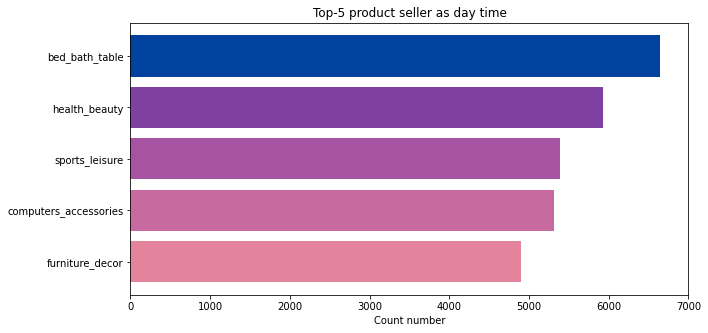

In [300]:
name = daytime_res['product_category_name_english'].tolist()
data = daytime_res['order_item_id'].tolist()
colors = ['#00429d', '#7f40a2', '#a653a1', '#c76a9f', '#e4849c']
plt.figure(figsize=(10, 5))
hbars = plt.barh(name, data, color = colors)
plt.title('Top-5 product seller as day time')
plt.xlabel('Count number')
plt.xlim(0, 7000)
plt.gca().invert_yaxis()

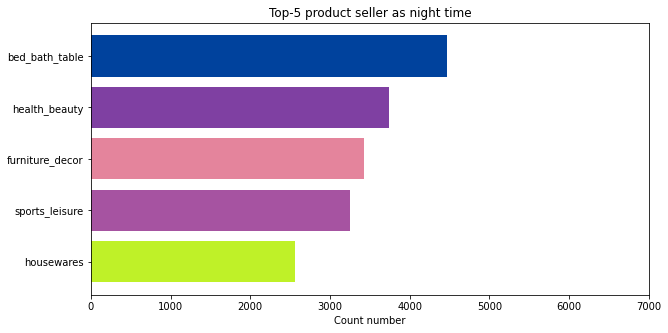

In [302]:
name = nighttime_res['product_category_name_english'].tolist()
data = nighttime_res['order_item_id'].tolist()
colors = ['#00429d', '#7f40a2', '#e4849c', '#a653a1', '#bff128']

plt.figure(figsize=(10, 5))
plt.barh(name, data, color = colors)
plt.title('Top-5 product seller as night time')
plt.xlabel('Count number')
plt.xlim(0, 7000)
plt.gca().invert_yaxis()

# ข้อ 2
ทำ visualization แสดงมูลค่าการสั่งซื้อ (ราคารวม) ในตามวันในสัปดาห์ (Day of the week)

In [32]:
#ตารางที่ใช้ 
# 1. olist_order_items_dataset.csv ตารางที่จะบอกราคาในเเต่ละ order
# 2. olist_orders_dataset.csv ตาราง order

## ขั้นตอนที่ 1 ใช้ตารางจากข้อ 1 "items_ProductName_times_1"

In [303]:
items_ProductName_times_1.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,2017-09-13 08:59:02,8.59
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,2017-04-26 10:53:06,10.53
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,furniture_decor,2018-01-14 14:33:31,14.33


## ขั้นตอนที่ 2 สร้างคอลัมน์ใหม่เป็น Day of Week (name)

In [304]:
import calendar# import calendar module
Day =[]
for i in items_ProductName_times_1['order_purchase_timestamp']:
    Day.append(calendar.day_name[i.weekday()])
items_ProductName_times_1['Day_of_Week'] = Day

## ขั้นตอนที่ 3 visualization
แสดงมูลค่าการสั่งซื้อ (ราคารวม) ในตามวันในสัปดาห์ (Day of the week)

In [305]:
Day_of_Week_price = items_ProductName_times_1.groupby('Day_of_Week').sum().sort_values(by=['price'], ascending = False).reset_index()[['Day_of_Week','price']]
Day_of_Week_price

,Day_of_Week,price
0,Monday,2230812.51
1,Tuesday,2172647.82
2,Wednesday,2113843.59
3,Thursday,2018615.78
4,Friday,1962426.75
5,Sunday,1589278.89
6,Saturday,1504018.36


In [382]:
Day_of_Week_price['Day_of_Week'].tolist()

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']

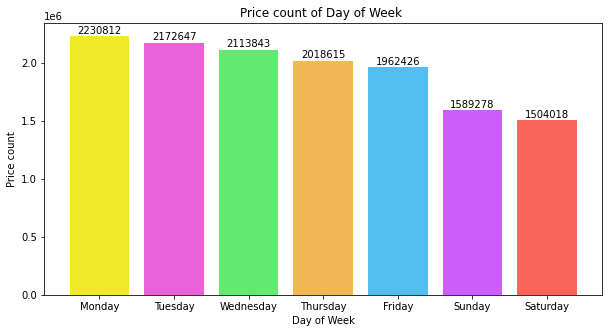

In [306]:
import matplotlib.pyplot as plt
 
day = Day_of_Week_price['Day_of_Week'].tolist()
price = Day_of_Week_price['price'].tolist()
colors = ['#F0E928', '#EA62DA', '#62E96F', '#F2B853', '#53BDF2', '#CE5CF9', '#F9655C']

plt.figure(figsize=(10, 5))

# Plot the bar graph
plot = plt.bar(day, price, color = colors)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("Price count of Day of Week ")
plt.xlabel("Day of Week")
plt.ylabel("Price count")
 
# Display the graph on the screen
plt.show()

# ข้อ 3
ทำ visualization แสดงสินค้ายอดนิยมในแต่ละรัฐ (state)

In [38]:
#ตารางที่ใช้ 
#1.items_ProductName_times_1  ตารางจากข้อ 2 มีข้อมูลรายการสั่งซื้อสินค้า พร้อมชื่อสินค้าภาษาอังกฤษ

In [307]:
items_ProductName_times_1.head(3) #ตารางจากข้อ 2 มีข้อมูลรายการสั่งซื้อสินค้า พร้อมชื่อสินค้าภาษาอังกฤษ

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour,Day_of_Week
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,2017-09-13 08:59:02,8.59,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,2017-04-26 10:53:06,10.53,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,furniture_decor,2018-01-14 14:33:31,14.33,Sunday


In [308]:
orders_2 = pd.read_csv(os.path.join(path,'olist_orders_dataset.csv'))
print(f' จำนวนเเถวในตาราง: {len(orders_2)}')
orders_2.head(3)

 จำนวนเเถวในตาราง: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [309]:
customers_3 = pd.read_csv(os.path.join(path,'olist_customers_dataset.csv'))
print(f' จำนวนเเถวในตาราง: {len(customers_3)}')
customers_3.head(3)

 จำนวนเเถวในตาราง: 99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


## ขั้นตอนที่ 1 เชื่อมตาราง  items_ProductName_times_1 กับ orders_2
เพื่อเชื่อมข้อมูล customer_id

In [310]:
items_ProductName_times_1['customer_id'] = items_ProductName_times_1['order_id'] .map(orders_2.set_index('order_id')['customer_id'])
items_ProductName_times_CusID_1 = items_ProductName_times_1
print(f' จำนวนเเถวในตาราง: {len(items_ProductName_times_CusID_1)}')
items_ProductName_times_CusID_1.head()

 จำนวนเเถวในตาราง: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour,Day_of_Week,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,2017-09-13 08:59:02,8.59,Wednesday,3ce436f183e68e07877b285a838db11a
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2017-04-26 10:53:06,10.53,Wednesday,f6dd3ec061db4e3987629fe6b26e5cce
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,2018-01-14 14:33:31,14.33,Sunday,6489ae5e4333f3693df5ad4372dab6d3
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,2018-08-08 10:00:35,10.00,Wednesday,d4eb9395c8c0431ee92fce09860c5a06
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,2017-02-04 13:57:51,13.57,Saturday,58dbd0b2d70206bf40e62cd34e84d795


## ขั้นตอนที่ 2 เชื่อมตาราง items_ProductName_times_CusID_1 กับ customers_3
เพื่อเชื่อมข้อมูล customer_state

In [311]:
items_ProductName_times_CusID_1['customer_state'] = items_ProductName_times_CusID_1['customer_id'] .map(customers_3.set_index('customer_id')['customer_state'])
items_ProductName_times_CusID_state_1 = items_ProductName_times_CusID_1
print(f' จำนวนเเถวในตาราง: {len(items_ProductName_times_CusID_state_1)}')
items_ProductName_times_CusID_state_1.head()

 จำนวนเเถวในตาราง: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour,Day_of_Week,customer_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,2017-09-13 08:59:02,8.59,Wednesday,3ce436f183e68e07877b285a838db11a,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2017-04-26 10:53:06,10.53,Wednesday,f6dd3ec061db4e3987629fe6b26e5cce,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,2018-01-14 14:33:31,14.33,Sunday,6489ae5e4333f3693df5ad4372dab6d3,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,2018-08-08 10:00:35,10.00,Wednesday,d4eb9395c8c0431ee92fce09860c5a06,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,2017-02-04 13:57:51,13.57,Saturday,58dbd0b2d70206bf40e62cd34e84d795,SP


## ขั้นตอนที่ 3 หา สินค้ายอดนิยมของเเต่ละรัฐ

In [312]:
print('จำนวน customer_state ทั้งหมด:', len(set(items_ProductName_times_CusID_state_1['customer_state'])))
print(set(items_ProductName_times_CusID_state_1['customer_state']))

จำนวน customer_state ทั้งหมด: 27
{'DF', 'PB', 'AL', 'TO', 'RR', 'RJ', 'AP', 'MS', 'PA', 'PI', 'RO', 'RN', 'PE', 'MG', 'GO', 'ES', 'SP', 'MA', 'SC', 'RS', 'AM', 'AC', 'PR', 'CE', 'BA', 'SE', 'MT'}


In [313]:
state = list(set(items_ProductName_times_CusID_state_1['customer_state']))
Product, Item_count =[], []
for i in state:
    data = items_ProductName_times_CusID_state_1[items_ProductName_times_CusID_state_1['customer_state'] == i]
    top_3 = data.groupby('product_category_name_english').count().sort_values(by=['product_id'], ascending = False).reset_index()[['product_category_name_english','product_id']].head(3)
    product = top_3['product_category_name_english'].tolist()
    item_count = top_3['product_id'].tolist()
    Product.append(product)
    Item_count.append(item_count)

In [314]:
print(Item_count[0])
print(Product[0])

[246, 224, 209]
['health_beauty', 'sports_leisure', 'bed_bath_table']


In [315]:
df = pd.DataFrame(state, columns =['customer_state'])
df['ProductTop3'] = Product
df['Item_countTop3'] = Item_count
df.head(5)

,customer_state,ProductTop3,Item_countTop3
0,DF,"[health_beauty, sports_leisure, bed_bath_table]","[246, 224, 209]"
1,PB,"[health_beauty, computers_accessories, watches...","[78, 54, 43]"
2,AL,"[health_beauty, computers_accessories, watches...","[63, 41, 36]"
3,TO,"[health_beauty, watches_gifts, sports_leisure]","[36, 30, 25]"
4,RR,"[sports_leisure, health_beauty, furniture_decor]","[8, 7, 6]"


## ขั้นตอนที่ 4  ใส่ชื่อเต็มให้กับ State โดยหาข้อมูลเพิ่มจาก google 
Ref: https://en.wikipedia.org/wiki/Federative_units_of_Brazil

In [316]:
state = pd.read_csv(os.path.join(path,'state.csv'))[['state name',	'code']]
print(len(state))
state.head(3)

27


,state name,code
0,Acre,AC
1,Alagoas,AL
2,Amapá,AP


In [317]:
df['state_name'] = df['customer_state'] .map(state.set_index('code')['state name'])
df_state_name = df
print(f' จำนวนเเถวในตาราง: {len(df_state_name)}')
df_state_name.head()

 จำนวนเเถวในตาราง: 27


,customer_state,ProductTop3,Item_countTop3,state_name
0,DF,"[health_beauty, sports_leisure, bed_bath_table]","[246, 224, 209]",Distrito Federal
1,PB,"[health_beauty, computers_accessories, watches...","[78, 54, 43]",Paraíba
2,AL,"[health_beauty, computers_accessories, watches...","[63, 41, 36]",Alagoas
3,TO,"[health_beauty, watches_gifts, sports_leisure]","[36, 30, 25]",Tocantins
4,RR,"[sports_leisure, health_beauty, furniture_decor]","[8, 7, 6]",Roraima


## ขั้นตอนที่ 5 visualization
แสดงสินค้ายอดนิยม Top-3 ในแต่ละรัฐ (state)

In [144]:
# top5 = items_ProductName_times_CusID_state_1.groupby('customer_state').count().sort_values(by=['order_item_id'], ascending = False).reset_index()[['customer_state','order_item_id']].head(5)
# top5

In [318]:
df.head(3)

,customer_state,ProductTop3,Item_countTop3,state_name
0,DF,"[health_beauty, sports_leisure, bed_bath_table]","[246, 224, 209]",Distrito Federal
1,PB,"[health_beauty, computers_accessories, watches...","[78, 54, 43]",Paraíba
2,AL,"[health_beauty, computers_accessories, watches...","[63, 41, 36]",Alagoas


In [319]:
import matplotlib.pyplot as plt
 
state = df['customer_state'].tolist()
count = df['Item_countTop3'].tolist()
name = df['ProductTop3'].tolist()

count_1 =[]
for i in count:
    count_1.append(i[0])
df['count_Top1'] = count_1
count_2 =[]
for i in count:
    count_2.append(i[1])
df['count_Top2'] = count_2
count_3 =[]
for i in count:
    count_3.append(i[2])
df['count_Top3'] = count_3

name_1 =[]
for i in name:
    name_1.append(i[0])
df['ProductName_Top1'] = name_1

name_2 =[]
for i in name:
    name_2.append(i[1])
df['ProductName_Top2'] = name_2

name_3 =[]
for i in name:
    name_3.append(i[2])
df['ProductName_Top3'] = name_3

In [320]:
#ใส่สีให้กับสินค้า
print(set(name_1))
print(set(name_2))
print(set(name_3))
colors = dict(zip(
    ['bed_bath_table', 'furniture_decor', 'health_beauty', 'sports_leisure'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381']
))
group_lk1 = df.set_index('state_name')['ProductName_Top1'].to_dict()

colors = dict(zip(
    ['health_beauty', 'watches_gifts', 'sports_leisure', 'furniture_decor', 'computers_accessories'],
    ['#90d595', '#f97306', '#e48381', '#ffb3ff','#80013f']
))
group_lk2 = df.set_index('state_name')['ProductName_Top2'].to_dict()

colors = dict(zip(
    ['bed_bath_table', 'health_beauty', 'telephony', 'watches_gifts', 'sports_leisure', 'furniture_decor', 'computers_accessories'],
    ['#adb0ff', '#90d595', '#ffad01', '#f97306','#e48381','#ffb3ff','#80013f']
))
group_lk3 = df.set_index('state_name')['ProductName_Top3'].to_dict()

{'bed_bath_table', 'health_beauty', 'furniture_decor', 'sports_leisure'}
{'health_beauty', 'watches_gifts', 'sports_leisure', 'furniture_decor', 'computers_accessories'}
{'bed_bath_table', 'health_beauty', 'telephony', 'watches_gifts', 'sports_leisure', 'furniture_decor', 'computers_accessories'}


In [321]:
# items_ProductName_times_CusID_state_1['order_purchase_timestamp'].describe() #ดูข้อมูลช่วงปี

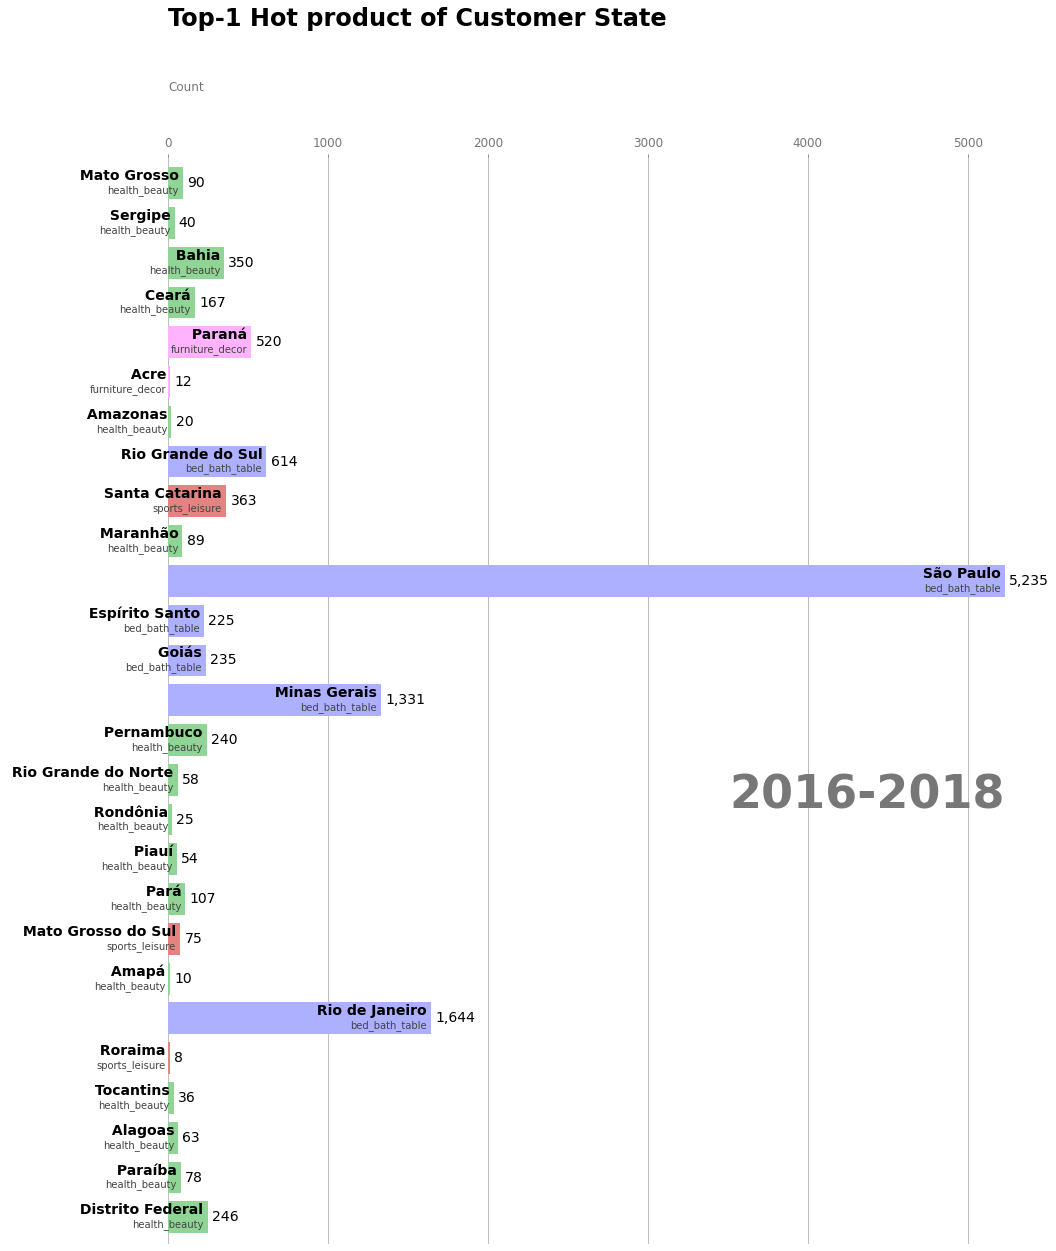

In [322]:
# fig, ax = plt.subplots(figsize=(15, 20))
def draw_barchart(year,Top):
    fig, ax = plt.subplots(figsize=(15, 20))
    top =Top
    if top == 1:
        group_lk = group_lk1
    elif top ==2:
        group_lk = group_lk2
    else:
        group_lk = group_lk3
    dff = df
    ax.clear()
    ax.barh(dff['state_name'], dff['count_Top1'], color=[colors[group_lk[x]] for x in dff['state_name']])
    dx = dff['count_Top1'].max() / 200
    for i, (value, name) in enumerate(zip(dff['count_Top1'], dff['state_name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Count', transform=ax.transAxes, size=12, color='#777777')
    # ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    title = f'Top-{top} Hot product of Customer State'
    ax.text(0, 1.12, title,
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    plt.show

draw_barchart('2016-2018',Top = 1)

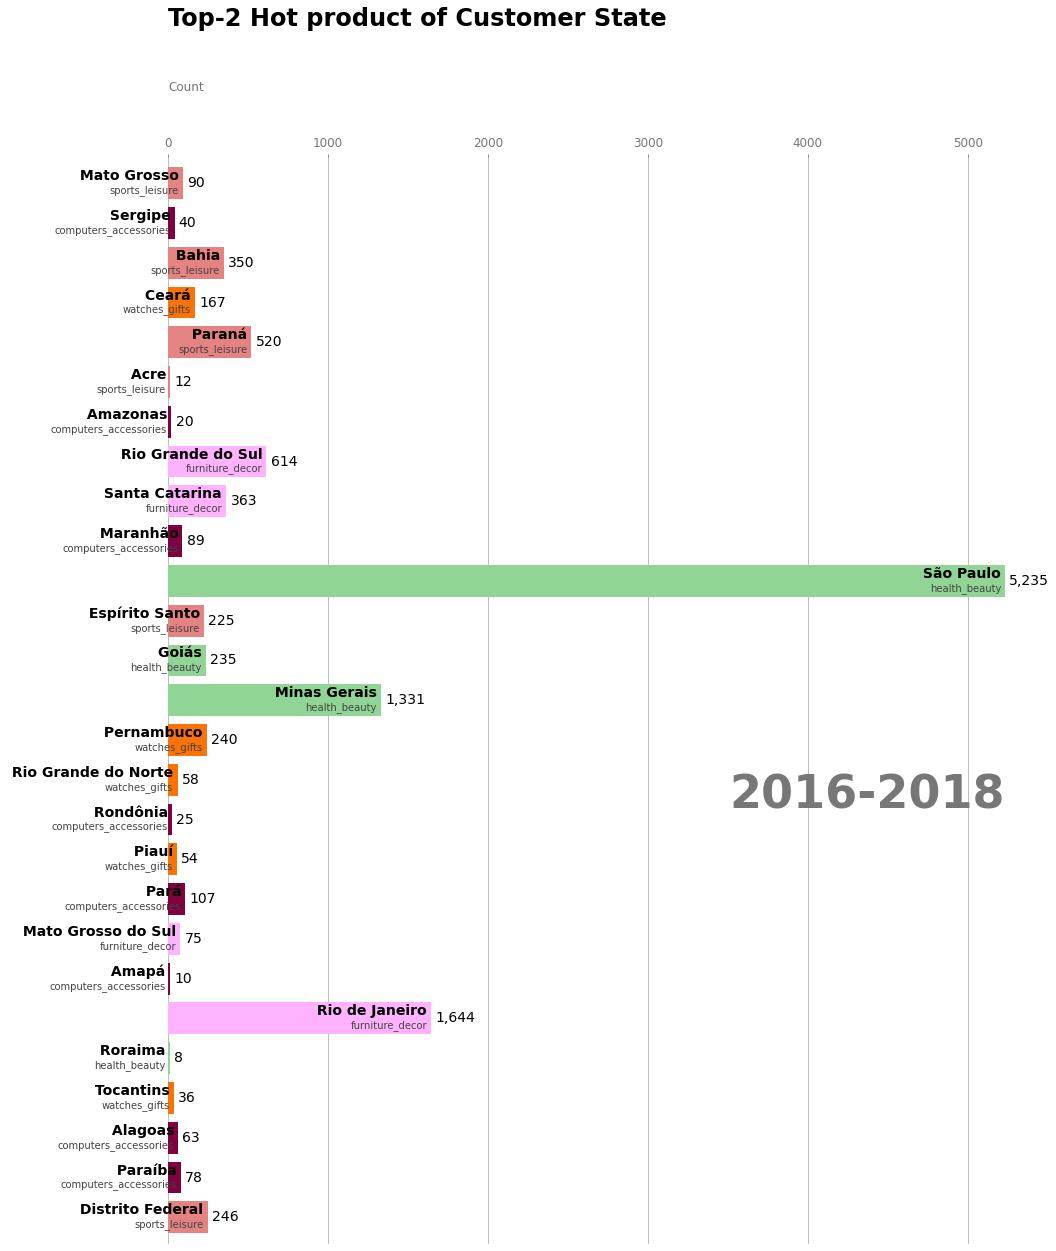

In [323]:
draw_barchart('2016-2018',Top =2)

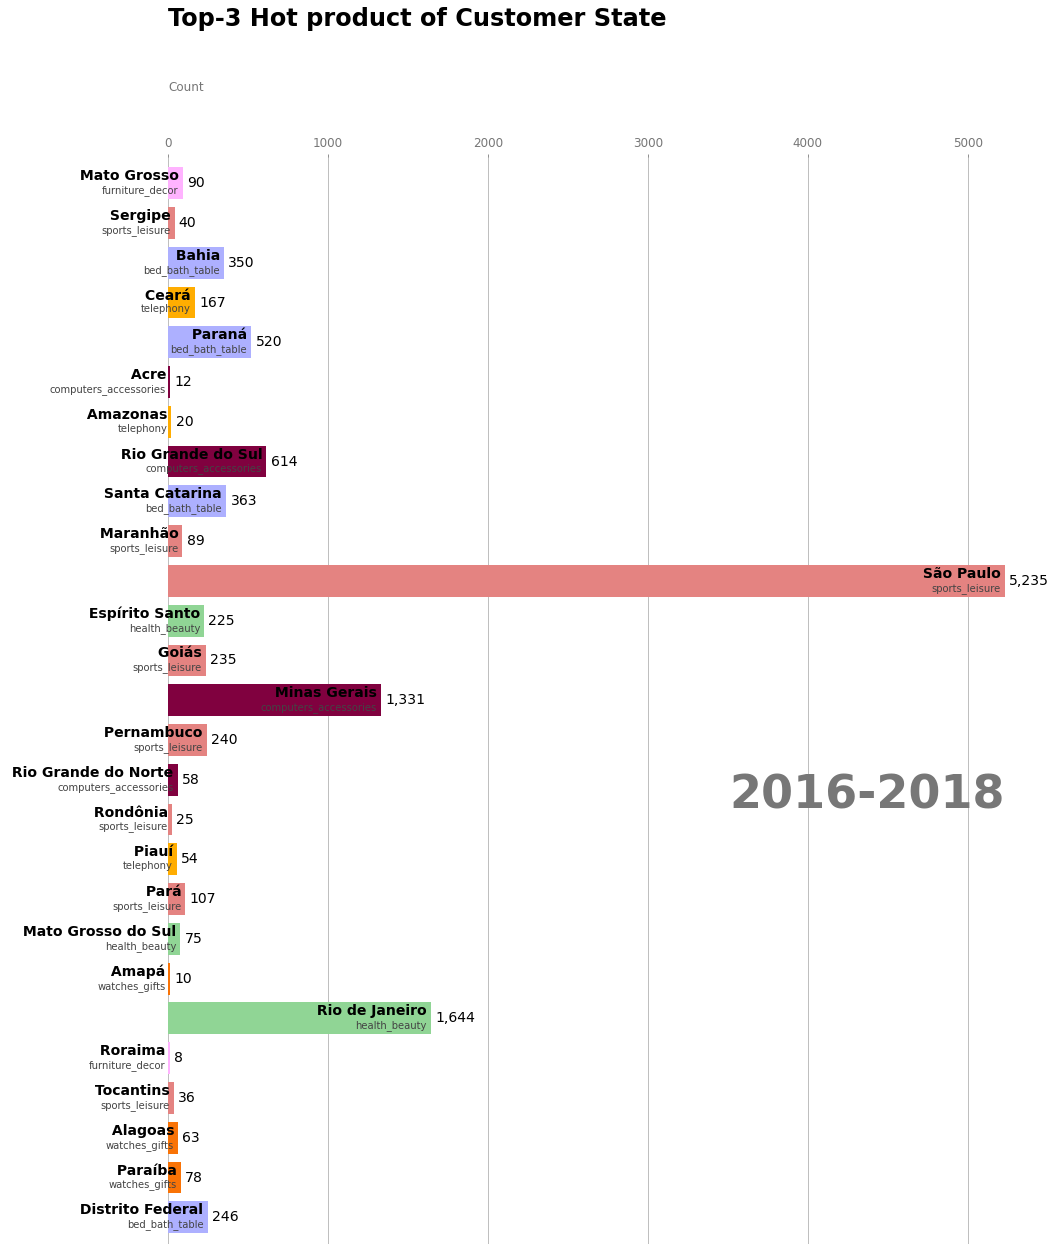

In [324]:
draw_barchart('2016-2018',Top =3)

# ข้อ 4
เดือนไหน ที่มีคนซื้อสินค้ามากที่สุด (จำนวนคำสั่งซื้อ) ชนิดสินค้า(product category ภาษาอังกฤษ) อะไร (จำนวน item)

In [ ]:
#ตารางที่ใช้ 
#1.items_ProductName_times_1  ตารางจากข้อ 3 มีข้อมูลรายการสั่งซื้อสินค้า พร้อมชื่อ category สินค้าภาษาอังกฤษ


In [325]:
items_ProductName_times_1.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour,Day_of_Week,customer_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,2017-09-13 08:59:02,8.59,Wednesday,3ce436f183e68e07877b285a838db11a,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,2017-04-26 10:53:06,10.53,Wednesday,f6dd3ec061db4e3987629fe6b26e5cce,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,furniture_decor,2018-01-14 14:33:31,14.33,Sunday,6489ae5e4333f3693df5ad4372dab6d3,MG


## ขั้นตอนที่ 1 สร้าง คอลัมน์ เดือน ในตาราง items_ProductName_times_1

In [326]:
items_ProductName_times_1.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour,Day_of_Week,customer_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,2017-09-13 08:59:02,8.59,Wednesday,3ce436f183e68e07877b285a838db11a,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,2017-04-26 10:53:06,10.53,Wednesday,f6dd3ec061db4e3987629fe6b26e5cce,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,furniture_decor,2018-01-14 14:33:31,14.33,Sunday,6489ae5e4333f3693df5ad4372dab6d3,MG


In [327]:
def NumTomonth(numMonth):
    return {
            1:'January',
            2:'February',
            3:'March',
            4:'April',
            5:'May',
            6:'June',
            7:'July',
            8:'August',
            9:'September',
            10:'October',
            11:'November',
            12:'December',
    }[numMonth]

In [328]:
calendar.month_abbr[items_ProductName_times_1['order_purchase_timestamp'][0].month]# ฟังก์ชันนี้ใช้ได้เเต่ชื่อไม่เต็ม

'Sep'

In [329]:
import calendar# import calendar module
Month =[]
for i in items_ProductName_times_1['order_purchase_timestamp']:
    Month.append(i.month) #list ตัวเลขเดือน

monthName = []
for i in Month: 
    monthName.append(NumTomonth(i))
items_ProductName_times_1['Month'] = monthName

## ขั้นตอนที่ 2 หาที่มีคนซื้อสินค้ามากที่สุด 

In [330]:
Month_Top = items_ProductName_times_1.groupby('Month').sum().sort_values(by=['order_item_id'], ascending = False).reset_index()[['Month','order_item_id']]
Month_Top

,Month,order_item_id
0,May,14401
1,August,14392
2,July,13856
3,March,13352
4,April,12817
5,June,12589
6,February,11657
7,January,11066
8,November,10630
9,December,7352


In [331]:
#เดือนที่มีจำนวนการสั่งซื้อมากที่สุด และจำนวนการสั่งซื้อ

Month_Top1 = Month_Top.iloc[0,0]
order_item_Top1 = Month_Top.iloc[0,1]
print('Month_Top1:', Month_Top1)
print('order_item_Top1:',order_item_Top1)

Month_Top1: May
order_item_Top1: 14401


## ขั้นตอนที่ 3  หาชนิดสินค้า(product category ภาษาอังกฤษ) อะไร และ (จำนวน item) เท่าไหร่ ในเดือนที่มีจำนวนการสั่งซื้อมากที่สุด

In [332]:
May = items_ProductName_times_1[items_ProductName_times_1['Month'] == Month_Top1]
May.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour,Day_of_Week,customer_id,customer_state,Month
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.9,12.69,housewares,2017-05-15 21:42:34,21.42,Monday,816cbea969fe5b689b39cfc97a506742,MG,May
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.0,8.77,perfumery,2018-05-11 20:33:38,20.33,Friday,fff5169e583fd07fac9fec88962f189d,SP,May
35,0014ae671de39511f7575066200733b7,1,23365beed316535b4105bd800c46670e,92eb0f42c21942b6552362b9b114707d,2017-05-29 03:15:24,16.5,14.10,telephony,2017-05-22 13:49:03,13.49,Monday,41065d9dcea52218c3943d2eed072b97,PR,May


In [333]:
May_ = May.groupby('product_category_name_english').sum().sort_values(by=['order_item_id'], ascending = False).reset_index()[['product_category_name_english','order_item_id']]
May_.head(3)

,product_category_name_english,order_item_id
0,bed_bath_table,1368
1,housewares,1272
2,health_beauty,1206


## ขั้นตอนที่ 4 visualization
แสดง เดือนไหน ที่มีคนซื้อสินค้ามากที่สุด (จำนวนคำสั่งซื้อ) ชนิดสินค้า(product category ภาษาอังกฤษ) อะไร (จำนวน item)


In [334]:
Month_Top.head(5)

,Month,order_item_id
0,May,14401
1,August,14392
2,July,13856
3,March,13352
4,April,12817


In [335]:
#เดือนที่มีจำนวนการสั่งซื้อมากที่สุด และจำนวนการสั่งซื้อ

Month_Top1 = Month_Top.iloc[0,0]
order_item_Top1 = Month_Top.iloc[0,1]
print('Month_Top1:', Month_Top1)
print('order_item_Top1:',order_item_Top1)

Month_Top1: May
order_item_Top1: 14401


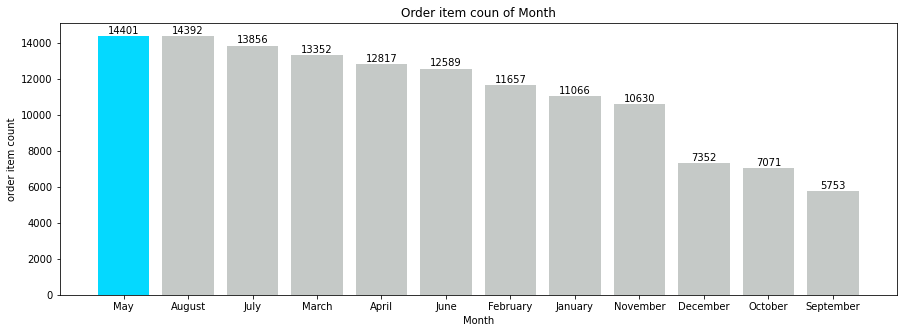

In [336]:
import matplotlib.pyplot as plt
 
Month = Month_Top['Month'].tolist()
order_item = Month_Top['order_item_id'].tolist()

colors = ['#04d9ff','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7']
plt.figure(figsize=(15, 5))

# Plot the bar graph
plot = plt.bar(Month, order_item, color = colors)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("Order item coun of Month")
plt.xlabel("Month")
plt.ylabel("order item count")
 
# Display the graph on the screen
plt.show()

In [337]:
May_.head(5)

,product_category_name_english,order_item_id
0,bed_bath_table,1368
1,housewares,1272
2,health_beauty,1206
3,furniture_decor,1165
4,computers_accessories,995


In [338]:
May_top10 = May_[:10:] #จะ visualization สินค้าเเต่ Top-10 ที่นิยมในเดือนที่มียอดสั่งซื้อสูงสุด
May_top10['index'] = ['1','2','3','4','5','6','7','8','9','10']
May_top10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,product_category_name_english,order_item_id,index
0,bed_bath_table,1368,1
1,housewares,1272,2
2,health_beauty,1206,3
3,furniture_decor,1165,4
4,computers_accessories,995,5
5,sports_leisure,933,6
6,watches_gifts,849,7
7,garden_tools,561,8
8,telephony,522,9
9,auto,481,10


In [339]:
product_category = May_top10['product_category_name_english'].tolist()
order_item = May_top10['order_item_id'].tolist()

In [340]:
print(product_category)

['bed_bath_table', 'housewares', 'health_beauty', 'furniture_decor', 'computers_accessories', 'sports_leisure', 'watches_gifts', 'garden_tools', 'telephony', 'auto']


In [341]:
#ใส่สีให้กับสินค้า
print(set(product_category))

colors = dict(zip(
    ['bed_bath_table', 'housewares', 'health_beauty', 'furniture_decor', 'computers_accessories', 'sports_leisure', 'watches_gifts', 'garden_tools', 'telephony', 'auto'],
    ['#FF6666', '#CC9966', '#999966', '#669966','#339966','#009966','#009999','#339999', '#669999', '#999999']
))
group_lk = May_top10.set_index('index')['product_category_name_english'].to_dict()

{'bed_bath_table', 'health_beauty', 'housewares', 'telephony', 'auto', 'garden_tools', 'watches_gifts', 'sports_leisure', 'furniture_decor', 'computers_accessories'}


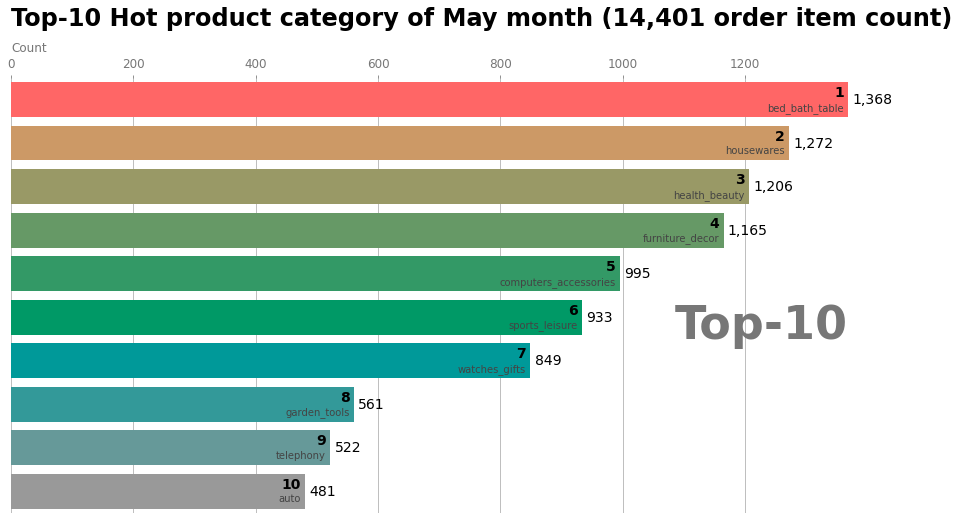

In [342]:
def draw_barchart(year,Top,):
    fig, ax = plt.subplots(figsize=(15, 8))
    top =Top
    dff = May_top10[::-1]
    ax.clear()
    ax.barh(dff['index'], dff['order_item_id'], color=[colors[group_lk[x]] for x in dff['index']])
    dx = dff['order_item_id'].max() / 200
    for i, (value, name) in enumerate(zip(dff['order_item_id'], dff['index'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Count', transform=ax.transAxes, size=12, color='#777777')
    # ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    title = f'Top-{top} Hot product category of May month (14,401 order item count)'
    ax.text(0, 1.12, title,
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    plt.show

draw_barchart('Top-10',Top = 10)

# ข้อ 5  
ทำ visualization แสดงมูลค่าการสั่งซื้อ (ราคารวม) ของแต่ละวันในในสัปดาห์ (Day of the week) ตามช่วงเวลาต่างๆ

แบ่ง 24 ชั่วโมงเป็น 2 ส่วน 

*   ช่วงกลางวัน “06.00 น. - 18.00 น.”
*   ช่วงกลางคืน“18.01 น. - 05.59 น.”


In [397]:
daytime = items_ProductName_times_1[(items_ProductName_times_1['order_purchase_Hour']>= 6.00) & (items_ProductName_times_1['order_purchase_Hour']<=18.00)] #ช่วงกลางวัน “06.00 น. - 18.00 น.”
print(f' จำนวนข้อมูล day time: {len(daytime)}')
nighttime = items_ProductName_times_1[((items_ProductName_times_1['order_purchase_Hour']>= 00.00) & (items_ProductName_times_1['order_purchase_Hour']<=5.59)) | (items_ProductName_1['order_purchase_Hour']>= 18.01)] #ช่วงกลางคืน“00.00 น. - 05.59 น.”, “18.01 น. - 23.59 น.”
print(f' จำนวนข้อมูล night time: {len(nighttime)}')

 จำนวนข้อมูล day time: 69134
 จำนวนข้อมูล night time: 43516


## ขั้นตอนที่ 1 สร้างตารางมูลค่าการสั่งซื้อในแต่ละวัน

In [398]:
#daytime
Day_of_Week_daytime = daytime.groupby('Day_of_Week').sum().sort_values(by=['price'], ascending = False).reset_index()[['Day_of_Week','price']]
# Day_of_Week_daytime['Day_index'] = [2,4,3,6,5,7,1]
Day_of_Week_daytime['index'] = ['1','2','3','4','5','6','7']
# Day_of_Week_daytime = Day_of_Week_daytime.sort_values(by=['Day_index'], ascending = True).reset_index()
Day_of_Week_daytime

,Day_of_Week,price,index
0,Monday,1354413.45,1
1,Wednesday,1350467.35,2
2,Tuesday,1340513.73,3
3,Friday,1281366.37,4
4,Thursday,1276881.96,5
5,Saturday,909006.93,6
6,Sunday,834806.42,7


In [399]:
#nighttime
Day_of_Week_nighttime = nighttime.groupby('Day_of_Week').sum().sort_values(by=['price'], ascending = False).reset_index()[['Day_of_Week','price']]
# Day_of_Week_nighttime['Day_index'] = [2,3,4,1,5,6,7]
Day_of_Week_nighttime['index'] = ['1','2','3','4','5','6','7']
# Day_of_Week_nighttime = Day_of_Week_nighttime.sort_values(by=['Day_index'], ascending = True).reset_index()
Day_of_Week_nighttime

,Day_of_Week,price,index
0,Monday,876399.06,1
1,Tuesday,832134.09,2
2,Wednesday,763376.24,3
3,Sunday,754472.47,4
4,Thursday,741733.82,5
5,Friday,681060.38,6
6,Saturday,595011.43,7


## ขั้นตอนที่ 2 visualization
ทำ visualization แสดงมูลค่าการสั่งซื้อ (ราคารวม) ของแต่ละวันในในสัปดาห์ (Day of the week) ตามช่วงเวลาต่างๆ

In [400]:
#ใส่สีให้กับสินค้า
print(set(product_category))

colors = dict(zip(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday'],
    ['#F0E928', '#EA62DA', '#62E96F', '#F2B853', '#53BDF2', '#CE5CF9', '#F9655C']
))
group_lk1 = Day_of_Week_daytime.set_index('index')['Day_of_Week'].to_dict()
group_lk2 = Day_of_Week_nighttime.set_index('index')['Day_of_Week'].to_dict()

{'bed_bath_table', 'health_beauty', 'housewares', 'telephony', 'auto', 'garden_tools', 'watches_gifts', 'sports_leisure', 'furniture_decor', 'computers_accessories'}


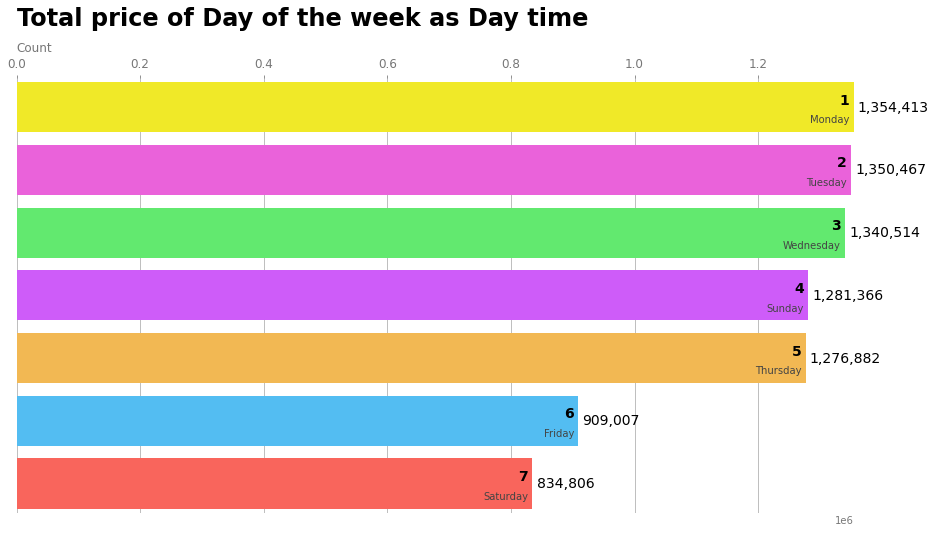

In [403]:
def draw_barchart(df,Top,):
    if time =='daytime':
        group_lk =group_lk1
    else:
        group_lk =group_lk2

    fig, ax = plt.subplots(figsize=(15, 8))
    top =Top
    dff = df[::-1]
    ax.clear()
    ax.barh(dff['index'], dff['price'], color=[colors[group_lk[x]] for x in dff['index']])
    dx = dff['price'].max() / 200
    for i, (value, name) in enumerate(zip(dff['price'], dff['index'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(0, 1.06, 'Count', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    title = f'Total price of Day of the week as {top}'
    ax.text(0, 1.12, title,
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    plt.show

draw_barchart(Day_of_Week_daytime,Top = 'Day time')

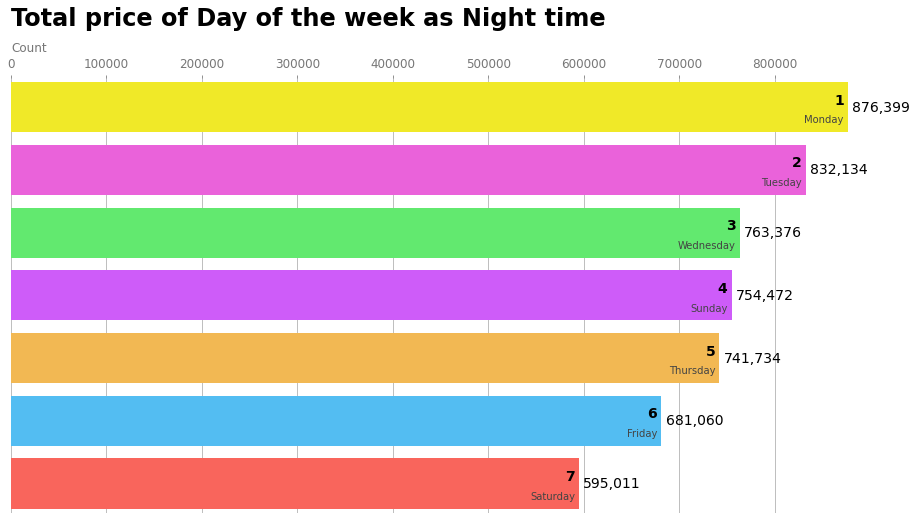

In [404]:
draw_barchart(Day_of_Week_nighttime,Top = 'Night time')

# ข้อ 6 
ทำ visualization แสดงมูลค่าการสั่งซื้อโดยเฉลี่ยรายเดือน และแสดงว่าภายในเดือนที่มีการสั่งซื้อโดยเฉลี่ยรายเดือนเยอะที่สุดนั้นส่วนใหญ่
ลูกค้ามาจากรัฐไหนบ้าง

In [406]:
items_ProductName_times_1.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour,Day_of_Week,customer_id,customer_state,Month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,2017-09-13 08:59:02,8.59,Wednesday,3ce436f183e68e07877b285a838db11a,RJ,September
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,2017-04-26 10:53:06,10.53,Wednesday,f6dd3ec061db4e3987629fe6b26e5cce,SP,April
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,furniture_decor,2018-01-14 14:33:31,14.33,Sunday,6489ae5e4333f3693df5ad4372dab6d3,MG,January


## ขั้นตอนที่ 1 หาเดือนที่มีมูลค่าการสั่งซื้อโดยเฉลี่ยรายเดือนเยอะที่สุด

In [412]:
Month_mean = items_ProductName_times_1.groupby('Month').mean().sort_values(by=['price'], ascending = False).reset_index()[['Month','price']]
Month_mean

,Month,price
0,September,129.147179
1,April,127.270380
2,October,125.545662
3,May,124.582441
4,June,121.767462
5,March,121.026811
6,July,120.018836
7,December,117.914895
8,August,117.507650
9,January,116.811441


In [434]:
Month_mean1 = Month_mean.iloc[0,0]
price_mean1 = Month_mean.iloc[0,1]
print('Month_Top1:', Month_mean1)
print('order_item_Top1:',price_mean1)

Month_Top1: September
order_item_Top1: 129.14717858619565


## ขั้นตอนที่ 2 หาว่าส่วนใหญ่ลูกค้ามาจากรัฐไหน นับรายคนด้วย customer_id เเบบไม่ซ้ำกัน

In [415]:
Sep = items_ProductName_times_1[items_ProductName_times_1['Month'] == Month_mean1]
Sep.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp,order_purchase_Hour,Day_of_Week,customer_id,customer_state,Month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,2017-09-13 08:59:02,8.59,Wednesday,3ce436f183e68e07877b285a838db11a,RJ,September
24,0010b2e5201cc5f1ae7e9c6cc8f5bd00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-09-15 18:04:37,48.9,16.60,cool_stuff,2017-09-11 17:39:33,17.39,Monday,57ef317d4818cb42680fc9dfd13867ce,RJ,September
91,00337fe25a3780b3424d9ad7c5a4b35e,1,1f9799a175f50c9fa725984775cac5c5,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,59.9,9.94,bed_bath_table,2017-09-25 17:39:29,17.39,Monday,4b1b5c848616a4b5fa9d76cb1d12067b,SP,September


In [424]:
Sep = Sep.drop_duplicates(subset=['customer_id']) #ลบแถวที่มี customer_id ซ้ำ กรณี ลูกค้าซื้อหลายรอบ

In [433]:
Sep_state = Sep.groupby('customer_state').count().sort_values(by=['customer_id'], ascending = False).reset_index()[['customer_state','customer_id']]
Sep_state.head()

,customer_state,customer_id
0,SP,1617
1,RJ,606
2,MG,501
3,RS,278
4,PR,179


## ขั้นตอนที่ 3 ใส่ชื่อเต็มให้กับ State โดยหาข้อมูลเพิ่มจาก google

In [431]:
state = pd.read_csv(os.path.join(path,'state.csv'))[['state name',	'code']]
print(len(state))
state.head(3)

27


,state name,code
0,Acre,AC
1,Alagoas,AL
2,Amapá,AP


In [432]:
Sep_state['state_name'] = Sep_state['customer_state'].map(state.set_index('code')['state name'])
print(f' จำนวนเเถวในตาราง: {len(Sep_state)}')
Sep_state.head()

 จำนวนเเถวในตาราง: 27


,customer_state,customer_id,state_name
0,SP,1617,São Paulo
1,RJ,606,Rio de Janeiro
2,MG,501,Minas Gerais
3,RS,278,Rio Grande do Sul
4,PR,179,Paraná


## ขั้นตอนที่ 4 visualization
ทำ visualization แสดงมูลค่าการสั่งซื้อโดยเฉลี่ยรายเดือน และแสดงว่าภายในเดือนที่มีการสั่งซื้อโดยเฉลี่ยรายเดือนเยอะที่สุดนั้นส่วนใหญ่ ลูกค้ามาจากรัฐไหนบ้าง

In [435]:
Month_mean1 = Month_mean.iloc[0,0]
price_mean1 = Month_mean.iloc[0,1]
print('Month_meanTop1:', Month_mean1)
print('price_meanTop1:',price_mean1)

Month_meanTop1: September
price_meanTop1: 129.14717858619565


In [436]:
Month_mean

,Month,price
0,September,129.147179
1,April,127.270380
2,October,125.545662
3,May,124.582441
4,June,121.767462
5,March,121.026811
6,July,120.018836
7,December,117.914895
8,August,117.507650
9,January,116.811441


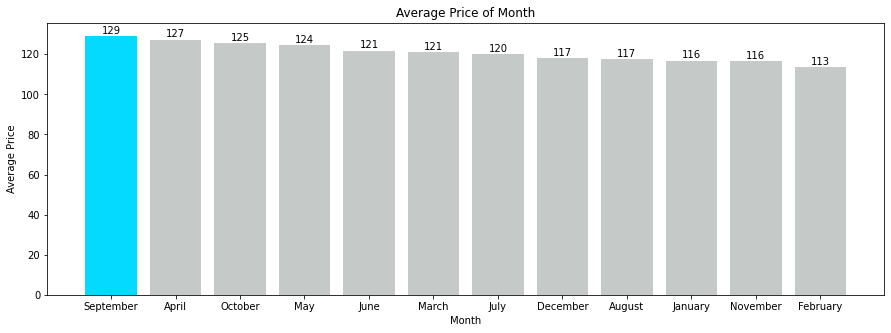

In [437]:
import matplotlib.pyplot as plt
 
Month = Month_mean['Month'].tolist()
order_item = Month_mean['price'].tolist()

colors = ['#04d9ff','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7','#c5c9c7']
plt.figure(figsize=(15, 5))

# Plot the bar graph
plot = plt.bar(Month, order_item, color = colors)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("Average Price of Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
 
# Display the graph on the screen
plt.show()

In [440]:
# ส่วนใหญ่ลูกค้ามาจากรัฐไหน นับรายคนด้วย customer_id เเบบไม่ซ้ำกัน (5 อันดับเเรก)
Sep_state['state_name'] = Sep_state['customer_state'].map(state.set_index('code')['state name'])
print(f' จำนวนเเถวในตาราง: {len(Sep_state)}')
Sep_state = Sep_state.head(5)
Sep_state

 จำนวนเเถวในตาราง: 27


,customer_state,customer_id,state_name
0,SP,1617,São Paulo
1,RJ,606,Rio de Janeiro
2,MG,501,Minas Gerais
3,RS,278,Rio Grande do Sul
4,PR,179,Paraná


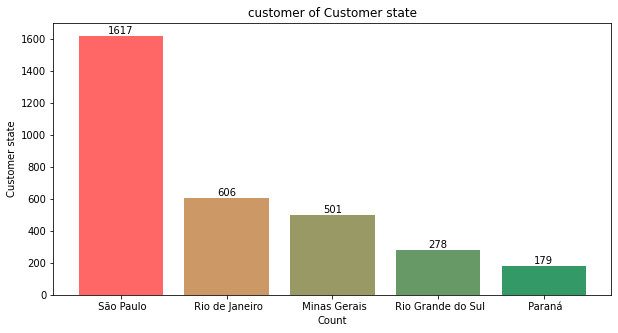

In [443]:
import matplotlib.pyplot as plt
 
state_name = Sep_state['state_name'].tolist()
customer_id = Sep_state['customer_id'].tolist()

colors = ['#FF6666', '#CC9966', '#999966', '#669966','#339966']
plt.figure(figsize=(10, 5))

# Plot the bar graph
plot = plt.bar(state_name, customer_id, color = colors)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("customer of Customer state")
plt.xlabel("Count")
plt.ylabel("Customer state")
 
# Display the graph on the screen
plt.show()